In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
sismosdf = pd.read_csv('SSNMX_catalogo_20240101_20251231.csv', skiprows=4)
sismosdf.head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,2024-01-01,00:15:51,3.2,18.7483,-104.6020,16.5,"45 km al SUROESTE de MANZANILLO, COL",2024-01-01,06:15:51,revisado
1,2024-01-01,00:30:39,4.3,15.5482,-95.8245,16.1,"41 km al SURESTE de CRUCECITA, OAX",2024-01-01,06:30:39,revisado
2,2024-01-01,00:53:59,3.1,19.5943,-102.4950,5.3,"2 km al OESTE de LOS REYES DE SALGADO, MICH",2024-01-01,06:53:59,revisado
3,2024-01-01,01:09:24,3.2,18.4185,-100.4230,55.4,"19 km al NOROESTE de ARCELIA, GRO",2024-01-01,07:09:24,revisado
4,2024-01-01,01:16:57,3.1,19.7267,-104.6570,54.0,"27 km al NOROESTE de CASIMIRO CASTILLO, JAL",2024-01-01,07:16:57,revisado


In [8]:
sismosdf.info()

<class 'pandas.DataFrame'>
RangeIndex: 72323 entries, 0 to 72322
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fecha                       72323 non-null  str    
 1   Hora                        72316 non-null  str    
 2   Magnitud                    72316 non-null  float64
 3   Latitud                     72316 non-null  float64
 4   Longitud                    72316 non-null  float64
 5   Profundidad                 72316 non-null  float64
 6   Referencia de localizacion  72316 non-null  str    
 7   Fecha UTC                   72316 non-null  str    
 8   Hora UTC                    72316 non-null  str    
 9   Estatus                     72316 non-null  str    
dtypes: float64(4), str(6)
memory usage: 5.5 MB


In [10]:
sismospd['Fecha'] = pd.to_datetime(sismospd['Fecha'], errors='coerce')
sismospd = sismospd.dropna(subset=['Fecha'])
idx_maximos = sismospd.groupby('Fecha')['Magnitud'].idxmax()
sismos_max_diarios = sismospd.loc[idx_maximos]
sismos_max_diarios.head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
1,2024-01-01,00:30:39,4.3,15.5482,-95.8245,16.1,"41 km al SURESTE de CRUCECITA, OAX",2024-01-01,06:30:39,revisado
69,2024-01-02,00:26:11,4.4,15.6295,-94.9672,26.8,"66 km al SURESTE de SALINA CRUZ, OAX",2024-01-02,06:26:11,revisado
247,2024-01-03,21:43:28,4.6,15.3383,-92.8212,105.3,"14 km al SURESTE de MAPASTEPEC, CHIS",2024-01-04,03:43:28,revisado
318,2024-01-04,19:29:58,4.2,15.6807,-97.3685,6.2,"37 km al SUR de RIO GRANDE, OAX",2024-01-05,01:29:58,revisado
386,2024-01-05,17:20:08,4.2,14.4513,-92.8245,24.0,"77 km al SUROESTE de CD HIDALGO, CHIS",2024-01-05,23:20:08,revisado


In [11]:
sismos_max_diarios.shape

(731, 10)

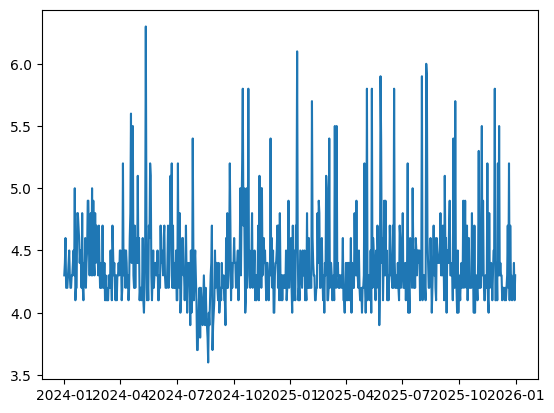

In [14]:
plt.plot(sismos_max_diarios['Fecha'], sismos_max_diarios['Magnitud'])